In [249]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


## Data

IMDB 5000 movie dataset: https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset


## Exploratory Data Analysis 

In [250]:
df = pd.read_csv("movie_metadata.csv")

In [251]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [252]:
df.shape

(5043, 28)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [254]:
#drop unecessary columns 
#—> keep actor 2, actor 1, actor 3, language, movie_title, gross, budget, num_voted_users, num_user_for_reviews, director_name 

data = df[['director_name', 'movie_title', 'genres', 'title_year', 'language', 'gross', 'budget', 'duration', 'actor_1_name' , 'actor_2_name', 'actor_3_name', 'num_voted_users', 'num_user_for_reviews', 'movie_facebook_likes', 'imdb_score']]


In [255]:
data.head()

,director_name,movie_title,genres,title_year,language,gross,budget,duration,actor_1_name,actor_2_name,actor_3_name,num_voted_users,num_user_for_reviews,movie_facebook_likes,imdb_score
0,James Cameron,Avatar,Action|Adventure|Fantasy|Sci-Fi,2009.0,English,760505847.0,237000000.0,178.0,CCH Pounder,Joel David Moore,Wes Studi,886204,3054.0,33000,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,2007.0,English,309404152.0,300000000.0,169.0,Johnny Depp,Orlando Bloom,Jack Davenport,471220,1238.0,0,7.1
2,Sam Mendes,Spectre,Action|Adventure|Thriller,2015.0,English,200074175.0,245000000.0,148.0,Christoph Waltz,Rory Kinnear,Stephanie Sigman,275868,994.0,85000,6.8
3,Christopher Nolan,The Dark Knight Rises,Action|Thriller,2012.0,English,448130642.0,250000000.0,164.0,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,1144337,2701.0,164000,8.5
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,Documentary,NaN,NaN,NaN,NaN,NaN,Doug Walker,Rob Walker,NaN,8,NaN,0,7.1


In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   director_name         4939 non-null   object 
 1   movie_title           5043 non-null   object 
 2   genres                5043 non-null   object 
 3   title_year            4935 non-null   float64
 4   language              5029 non-null   object 
 5   gross                 4159 non-null   float64
 6   budget                4551 non-null   float64
 7   duration              5028 non-null   float64
 8   actor_1_name          5036 non-null   object 
 9   actor_2_name          5030 non-null   object 
 10  actor_3_name          5020 non-null   object 
 11  num_voted_users       5043 non-null   int64  
 12  num_user_for_reviews  5022 non-null   float64
 13  movie_facebook_likes  5043 non-null   int64  
 14  imdb_score            5043 non-null   float64
dtypes: float64(6), int64(

In [257]:
# detect column with high percentage of missing value 
missing_percent = (data.isnull().sum() / len(data)) * 100

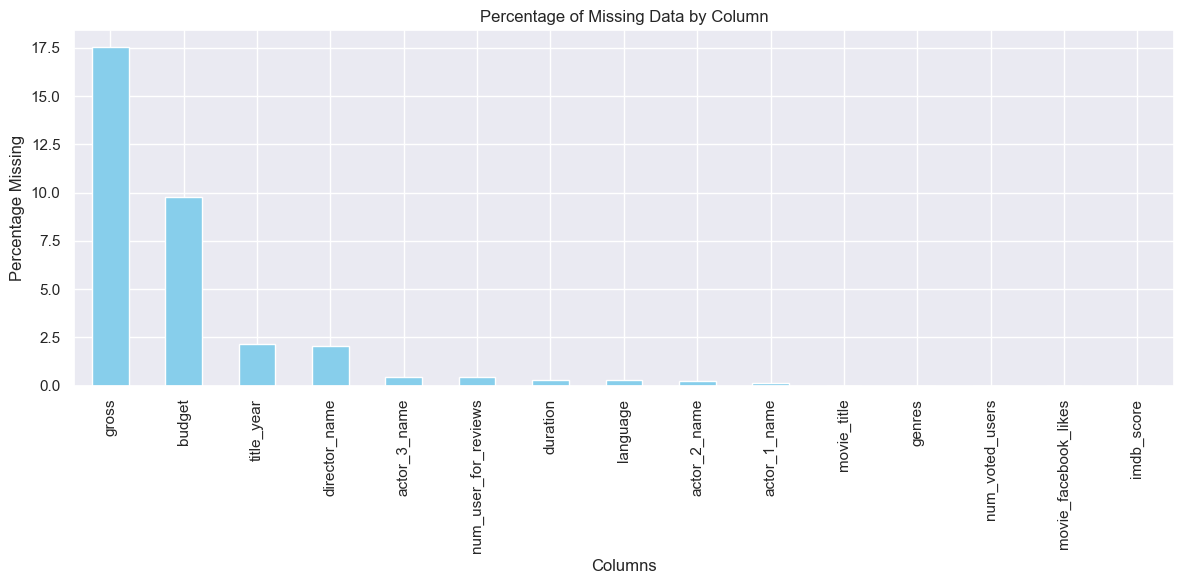

In [258]:
plt.figure(figsize=(12, 6))

missing_percent.sort_values(ascending = False).plot(kind="bar", color="skyblue")
plt.title("Percentage of Missing Data by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage Missing")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Gross and budget have the highest percentage missing data compared to other columns. We can consider to delete all the rows with NA in these columns 
As we have to find specific top most profitable movies so we need to be more specific and should not impute mean, median, mode 

In [259]:
data.dropna(subset = 'gross', inplace = True)

data.dropna(subset = 'budget', inplace = True)

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/1702653152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = 'gross', inplace = True)
/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/1702653152.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = 'budget', inplace = True)


In [260]:
data.isna().sum()

director_name            0
movie_title              0
genres                   0
title_year               0
language                 4
gross                    0
budget                   0
duration                 1
actor_1_name             3
actor_2_name             5
actor_3_name            10
num_voted_users          0
num_user_for_reviews     0
movie_facebook_likes     0
imdb_score               0
dtype: int64

In [261]:
data.dropna(subset = 'duration', inplace = True)
# Actor is an important factor so we need delete all rows with NA in all three actors 

data.dropna(subset=['actor_1_name', 'actor_2_name', 'actor_3_name'], how='all', inplace = True)

#fill the remaining NA value in actor name with Unknown Actor 

data['actor_1_name'].fillna('Unknown Actor', inplace = True)
data['actor_2_name'].fillna('Unknown Actor', inplace = True)
data['actor_3_name'].fillna('Unknown Actor', inplace = True)

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/4234034915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset = 'duration', inplace = True)
/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/4234034915.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['actor_1_name', 'actor_2_name', 'actor_3_name'], how='all', inplace = True)
/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/4234034915.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [262]:
#Using mode to replace NA value for categorical data 'language'
data['language'].fillna(data['language'].mode()[0], inplace = True)

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/2757039943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['language'].fillna(data['language'].mode()[0], inplace = True)


Removing duplicated values

In [263]:
data.drop_duplicates(subset = None, keep = 'first', inplace = True)

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/3823154240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(subset = None, keep = 'first', inplace = True)


## Finding Insights

> **1. Finding top 10 Profitable Movies**

In [264]:
# convert the gross and budget from $ to Million $ 
data['gross'] = data['gross'] / 1000000
data['budget'] = data['budget'] / 1000000

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/1660051144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gross'] = data['gross'] / 1000000
/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/1660051144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['budget'] = data['budget'] / 1000000


In [265]:
data['profit'] = data['gross'] - data['budget']

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/1260046071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit'] = data['gross'] - data['budget']


In [266]:
data.sort_values(by = 'profit', ascending = False, inplace = True)

df = data[['movie_title', 'profit']].head(10)
df.reset_index(drop = True)

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_96290/3970954341.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by = 'profit', ascending = False, inplace = True)


,movie_title,profit
0,Avatar,523.505847
1,Jurassic World,502.177271
2,Titanic,458.672302
3,Star Wars: Episode IV - A New Hope,449.935665
4,E.T. the Extra-Terrestrial,424.449459
5,The Avengers,403.279547
6,The Lion King,377.783777
7,Star Wars: Episode I - The Phantom Menace,359.544677
8,The Dark Knight,348.316061
9,The Hunger Games,329.999255


> **2. Language based gross analysis**

In [267]:
data.head()

,director_name,movie_title,genres,title_year,language,gross,budget,duration,actor_1_name,actor_2_name,actor_3_name,num_voted_users,num_user_for_reviews,movie_facebook_likes,imdb_score,profit
0,James Cameron,Avatar,Action|Adventure|Fantasy|Sci-Fi,2009.0,English,760.505847,237.0,178.0,CCH Pounder,Joel David Moore,Wes Studi,886204,3054.0,33000,7.9,523.505847
29,Colin Trevorrow,Jurassic World,Action|Adventure|Sci-Fi|Thriller,2015.0,English,652.177271,150.0,124.0,Bryce Dallas Howard,Judy Greer,Omar Sy,418214,1290.0,150000,7.0,502.177271
26,James Cameron,Titanic,Drama|Romance,1997.0,English,658.672302,200.0,194.0,Leonardo DiCaprio,Kate Winslet,Gloria Stuart,793059,2528.0,26000,7.7,458.672302
3024,George Lucas,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,1977.0,English,460.935665,11.0,125.0,Harrison Ford,Peter Cushing,Kenny Baker,911097,1470.0,33000,8.7,449.935665
3080,Steven Spielberg,E.T. the Extra-Terrestrial,Family|Sci-Fi,1982.0,English,434.949459,10.5,120.0,Henry Thomas,Dee Wallace,Peter Coyote,281842,515.0,34000,7.9,424.449459


In [268]:
pd.set_option('display.max_rows', 40)

data['language'].value_counts()

language
English       3673
French          37
Spanish         26
Mandarin        14
German          13
Japanese        12
Hindi           10
Cantonese        8
Italian          7
Portuguese       5
Korean           5
Norwegian        4
Danish           3
Dutch            3
Hebrew           3
Persian          3
Thai             3
Aboriginal       2
Dari             2
Indonesian       2
Czech            1
Filipino         1
Bosnian          1
Aramaic          1
Swedish          1
Kazakh           1
Mongolian        1
Arabic           1
Telugu           1
Icelandic        1
Russian          1
Dzongkha         1
Vietnamese       1
Zulu             1
Romanian         1
Maya             1
Hungarian        1
Name: count, dtype: int64

In [269]:
english_percent = (len(data[data['language'] == "English"]) / len(data)) * 100
english_percent

95.35306334371755

In [270]:
# We observed that 95.353% movies is in English, so we consider English as the origin and the remaining is others 

def convert_language(x):
    if (x == 'English'):
        return 'English'
    else:
        return 'Others'
    
data['type_language'] = data['language'].apply(convert_language)

data['type_language'].value_counts()

type_language
English    3673
Others      179
Name: count, dtype: int64

Now we analyze the profit across language among year

In [272]:
data['title_year'] = data['title_year'].astype(int)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


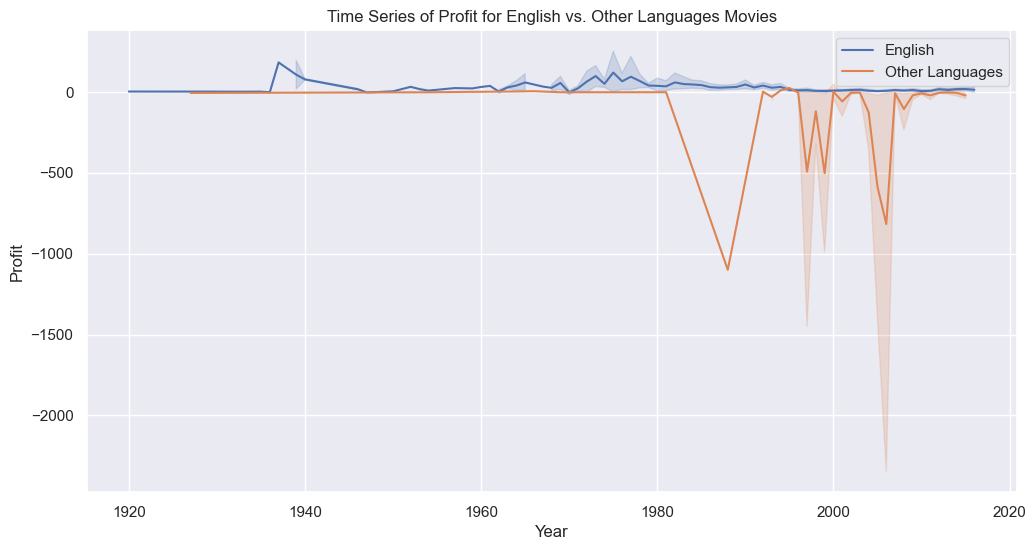

In [273]:
# plot a time series for profit for English versus other languages

english_movies = data[data['language'] == 'English']
other_language_movies = data[data['language'] != 'English']

sns.set(style="darkgrid")

plt.figure(figsize = (12, 6))
ax = sns.lineplot(x = 'title_year', y='profit', data = english_movies, label = 'English')
ax = sns.lineplot(x = 'title_year', y='profit', data = other_language_movies, label = 'Other Languages')

plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Time Series of Profit for English vs. Other Languages Movies')

plt.legend()

plt.show()

Movies in other languages experience a huge losses since 1980 to 2010 whereas English movie never go to losses overall. 
Find the movies that made the huge losses.

In [281]:
# Find the film with more than $1000M loss

data[data['profit'] < -1000][['movie_title', 'language', 'profit']].style.background_gradient()


,movie_title,language,profit
3423,Akira,Japanese,-1099.560838
2334,Steamboy,Japanese,-2127.109510
2323,Princess Mononoke,Japanese,-2397.701809
3005,Fateless,Hungarian,-2499.804112
3859,Lady Vengeance,Korean,-4199.788333
2988,The Host,Korean,-12213.298588


> **3. Profit for Different Genres**